# Air Quality and Population Density
**SIS 1 - CSCI3252 Data Collection and Preparation**

**Date: 23 October 2025**


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from time import sleep
from io import StringIO


## Web Scraping

Our source:"https://en.wikipedia.org/wiki/List_of_cities_proper_by_population_density"

We have collecte data on the most populated cities, its population, area and density

In [ ]:
url = "https://en.wikipedia.org/wiki/List_of_cities_proper_by_population_density"

response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
soup = BeautifulSoup(response.text, "html.parser")

table = soup.find("table", {"class": "wikitable"})


cities_df = pd.read_html(StringIO(str(table)))[0]
cities_df.head(50)



City Population Area      Density          \
                         City Population  km2  mi2    /km2    /mi2   
0                        Giza    4432915   98   38   45050  116679   
1                      Manila    1846513   43   17   43062  111532   
2          Croix-des-Bouquets     231077    5    2   42322  109614   
3                 Mandaluyong     425758   11    4   38495   99703   
4                        Malé     211908    6    2   36536   94628   
5                       Dhaka   10295786  305  118   33757   87430   
6                   Bnei Brak     237471    7    3   33503   86773   
7                    Caloocan    1661584   53   21   31233   80893   
8                     Kolkata    6200000  206   80   30097   77952   
9                      Makati     629616   22    8   28975   75044   
10             Port-au-Prince     988438   25   10   39084  101228   
11           Levallois-Perret      64379    2    1   26713   69187   
12                 Guédiawaye     373638   14    5   26688   69123   
13                  Montrouge      54260    2    1   26213   67891   
14                     Bogotá    8034649  307  119   26141   67705   
15                  Kathmandu     862400   49   19   17440   45169   
16                  Vincennes      49891    2    1   26121   67653   
17       Le Pré-Saint-Gervais      17950    1    0   25643   66415   
18                      Pasig     803159   31   12   25530   66122   
19                Saint-Mandé      22619    1    0   24586   63677   
20      Saint-Josse-ten-Noode      27548    1    0   24165   62587   
21                 Guttenberg      12017    1    0   24034   62248   
22                    Malabon     380522   16    6   23842   61751   
23                      Pasay     440656   19    7   23640   61229   
24      Neapoli, Thessaloniki      25822    1    0   27039   70030   
25                   Damascus    1711000   77   30   22221   57552   
26     San Juan, Metro Manila     126347    6    2   21524   55748   
27                    Navotas     247543   12    4   21507   55703   
28                     Asmara     963000   45   17   21400   55426   
29                    Mislata      43756    2    1   21241   55014   
30              Macau[note 1]     681293   33   13   20620   53406   
31                  Kallithea      97616    5    2   19473   50434   
32                 Nea Smyrni      72853    4    1   20615   53393   
33                      Paris    2187526  105   41   20755   53754   
34                 Union City      68589    3    1   20690   53588   
35                     Mumbai   12442373  603  233   20634   53442   
36                    Colombo     752993   37   14   20351   52710   
37  L'Hospitalet de Llobregat     252171   12    5   20336   52671   
38              West New York      52912    3    1   20288   52547   
39                   Marikina     456059   23    9   20144   52173   
40               Saint-Gilles      50002    3    1   19842   51391   
41                     Clichy      61070    3    1   19828   51354   
42               Kotsiubynske      17249    1    0   19826   51351   
43                 Courbevoie      81719    4    2   19597   50756   
44       Boulogne-Billancourt     120071    6    2   19460   50403   
45                 Giv'atayim      62242    3    1   19210   49755   
46                  Las Piñas     606293   32   12   18935   49041   
47                 Koekelberg      21990    1    0   18795   48679   
48    General Mariano Alvarez     172433    9    4   18344   47511   
49                     Monaco      38367    2    1   18446   47774   

          Country               Year  
          Country               Year  
0           Egypt            2017[1]  
1     Philippines    2020[2] 2018[3]  
2           Haiti            2024[4]  
3     Philippines         2020[2][5]  
4        Maldives            2022[6]  
5      Bangladesh            2022[7]  
6          Israel        2023 [8][9]  
7     Philippines         2020[2]

In [ ]:
if isinstance(cities_df.columns, pd.MultiIndex):
    cities_df.columns = ['_'.join(col).strip() for col in cities_df.columns.values]
cities_df = cities_df.rename(columns={
    "City_City": "City",
    "Country_Country": "Country",
    "Population_Population": "Population",
    "Area_km2": "Area_km2",
    "Density_/km2": "Density_km2"
})

needed_columns = ["City", "Country", "Population", "Area_km2", "Density_km2"]
cities_df = cities_df[[col for col in needed_columns if col in cities_df.columns]]


for column in ["Population", "Area_km2", "Density_km2"]:
    cities_df[column] = cities_df[column].astype(str).str.replace(",", "")
    cities_df[column] = pd.to_numeric(cities_df[column], errors='coerce')
cities_df = cities_df.dropna(subset=["City", "Density_km2"])

cities_df = cities_df.sort_values(by="Density_km2", ascending=False).head(50)
cities_df = cities_df.reset_index(drop=True)


print(cities_df.head(50))

                         City        Country  Population  Area_km2  \
0                        Giza          Egypt     4432915        98   
1                      Manila    Philippines     1846513        43   
2          Croix-des-Bouquets          Haiti      231077         5   
3              Port-au-Prince          Haiti      988438        25   
4                 Mandaluyong    Philippines      425758        11   
5                        Malé       Maldives      211908         6   
6                       Dhaka     Bangladesh    10295786       305   
7                   Bnei Brak         Israel      237471         7   
8                    Caloocan    Philippines     1661584        53   
9                     Kolkata          India     6200000       206   
10                     Makati    Philippines      629616        22   
11      Neapoli, Thessaloniki         Greece       25822         1   
12           Levallois-Perret         France       64379         2   
13                 G

## Geting City Coordinates
Using the Nominatim API, we obtained the latitude and longitude coordinates for each city



In [ ]:
def get_city_coordinates(city_name, country_name):
    try:
        search_query = f"{city_name}, {country_name}"
        api_url = f"https://nominatim.openstreetmap.org/search?q={search_query}&format=json&limit=1"

        response = requests.get(api_url, headers={"User-Agent": "Mozilla/5.0"})
        data = response.json()

        if data:
            latitude = float(data[0]["lat"])
            longitude = float(data[0]["lon"])
            return latitude, longitude
        else:
            return None, None

    except:
        return None, None
latitudes = []
longitudes = []


for index, row in cities_df.iterrows():
    city = row["City"]
    country = row["Country"]

    lat, lon = get_city_coordinates(city, country)

    latitudes.append(lat)
    longitudes.append(lon)
    sleep(1)
cities_df["Latitude"] = latitudes
cities_df["Longitude"] = longitudes


,City,Country,Population,Area_km2,Density_km2,Latitude,Longitude
0,Giza,Egypt,4432915,98,45050,29.987075,31.211806
1,Manila,Philippines,1846513,43,43062,14.590449,120.980362
2,Croix-des-Bouquets,Haiti,231077,5,42322,18.577544,-72.229622
3,Port-au-Prince,Haiti,988438,25,39084,18.547327,-72.339593
4,Mandaluyong,Philippines,425758,11,38495,14.577439,121.033897
5,Malé,Maldives,211908,6,36536,4.177988,73.510739
6,Dhaka,Bangladesh,10295786,305,33757,23.764386,90.389014
7,Bnei Brak,Israel,237471,7,33503,32.087390,34.832438
8,Caloocan,Philippines,1661584,53,31233,14.651348,120.972400
9,Kolkata,India,6200000,206,30097,22.572646,88.363895


## Air Quality Data

Using the  Open-Meteo Air Quality API, we obtained hourly data on:
- PM10 (particulate matter ≤10 μm)
- PM2.5 (fine particles ≤2.5 μm)
- CO (carbon monoxide)

and calculated average values ​​for each pollutant in each city.

source:"https://open-meteo.com/en/docs/air-quality-api"

In [ ]:
def get_air_pollution(latitude, longitude):

    try:
        api_url = (
            f"https://air-quality-api.open-meteo.com/v1/air-quality"
            f"?latitude={latitude}&longitude={longitude}"
            f"&hourly=pm10,pm2_5,carbon_monoxide")
        response = requests.get(api_url, timeout=10)
        data = response.json()

        hourly_data = data.get("hourly", {})
        pm10_values = hourly_data.get("pm10", [])
        pm25_values = hourly_data.get("pm2_5", [])
        co_values = hourly_data.get("carbon_monoxide", [])

        def calculate_average(values):
            clean_values = [v for v in values if v is not None]
            if clean_values:
                return sum(clean_values) / len(clean_values)
            else:
                return None

        avg_pm10 = calculate_average(pm10_values)
        avg_pm25 = calculate_average(pm25_values)
        avg_co = calculate_average(co_values)
        return avg_pm10, avg_pm25, avg_co

    except Exception as error:
        print(f"Ошибка: {error}")
        return None, None, None

pollution_data = []


for index, row in cities_df.iterrows():
    city = row["City"]
    lat = row["Latitude"]
    lon = row["Longitude"]
    if lat is None or lon is None:
        pollution_data.append([city, None, None, None])
        continue

    pm10, pm25, co = get_air_pollution(lat, lon)
    pollution_data.append([city, pm10, pm25, co])
    sleep(0.5)

pollution_df = pd.DataFrame(pollution_data, columns=["City", "PM10", "PM2.5", "CO"])
pollution_df = pollution_df.dropna(subset=["PM10", "PM2.5", "CO"], how="all")
pollution_df.head(50)


,City,PM10,PM2.5,CO
0,Giza,40.237615,26.475229,246.688073
1,Manila,18.136697,17.633028,481.522936
2,Croix-des-Bouquets,10.005505,9.627523,186.889908
3,Port-au-Prince,10.005505,9.627523,374.467890
4,Mandaluyong,8.187156,7.715596,471.449541
5,Malé,13.911927,7.533028,121.302752
6,Dhaka,75.582569,75.114679,755.577982
7,Bnei Brak,36.281651,17.291743,154.119266
8,Caloocan,24.409174,23.772477,516.513761
9,Kolkata,71.038532,70.544954,549.550459


##Merge
We merging data collected form Wikipedia Open-Meteo API by city name

In [ ]:
final_df = pd.merge(cities_df, pollution_df, on="City", how="left")
final_df = final_df.dropna(subset=["PM10", "PM2.5", "CO"], how="all").reset_index(drop=True)


print(f"\nИтоговая таблица ({len(final_df)} городов):")
print(final_df.head(50))


final_df.to_csv("cities_pollution_data.csv", index=False, encoding='utf-8-sig')


Итоговая таблица (49 городов):
                         City        Country  Population  Area_km2  \
0                        Giza          Egypt     4432915        98   
1                      Manila    Philippines     1846513        43   
2          Croix-des-Bouquets          Haiti      231077         5   
3              Port-au-Prince          Haiti      988438        25   
4                 Mandaluyong    Philippines      425758        11   
5                        Malé       Maldives      211908         6   
6                       Dhaka     Bangladesh    10295786       305   
7                   Bnei Brak         Israel      237471         7   
8                    Caloocan    Philippines     1661584        53   
9                     Kolkata          India     6200000       206   
10                     Makati    Philippines      629616        22   
11      Neapoli, Thessaloniki         Greece       25822         1   
12           Levallois-Perret         France       64379  

In [ ]:
clean_df = final_df.dropna(subset=["Density_km2", "PM2.5", "PM10", "CO"]).copy()
avg_pm25 = final_df["PM2.5"].mean()
avg_pm10 = final_df["PM10"].mean()
avg_co = clean_df["CO"].mean()

print("\nСредние показатели загрязнения воздуха:")
print(f"PM2.5: {avg_pm25:.2f} µg/m³")
print(f"PM10: {avg_pm10:.2f} µg/m³")
print(f"CO: {avg_co:.2f} µg/m³")

most_dense = clean_df.loc[clean_df["Density_km2"].idxmax()]
print(f"\nСамый густонаселённый город: {most_dense['City']} ({most_dense['Country']}) "
      f"— {most_dense['Density_km2']:.0f} чел/км²")

clean_df["Pollution_Index"] = clean_df[["PM2.5", "PM10", "CO"]].mean(axis=1)

most_polluted = clean_df.loc[clean_df["Pollution_Index"].idxmax()]
print(f"\n Самый загрязнённый город: {most_polluted['City']} ({most_polluted['Country']}) "
      f"— индекс загрязнения {most_polluted['Pollution_Index']:.2f}")

cleanest_city = clean_df.loc[clean_df["Pollution_Index"].idxmin()]
print(f"Самый чистый город: {cleanest_city['City']} ({cleanest_city['Country']}) "
      f"— индекс загрязнения {cleanest_city['Pollution_Index']:.2f}")

print("\nТоп-10 самых загрязнённых городов:")
print(clean_df.sort_values(by="Pollution_Index", ascending=False)
      [["City", "Country", "Pollution_Index"]].head(10))

print("\nТоп-10 самых чистых городов:")
print(clean_df.sort_values(by="Pollution_Index", ascending=True)
      [["City", "Country", "Pollution_Index"]].head(10))



Средние показатели загрязнения воздуха:
PM2.5: 13.07 µg/m³
PM10: 17.98 µg/m³
CO: 297.61 µg/m³

Самый густонаселённый город: Giza (Egypt) — 45050 чел/км²

 Самый загрязнённый город: Bogotá (Colombia) — индекс загрязнения 350.08
Самый чистый город: Monaco (Monaco) — индекс загрязнения 46.96

Топ-10 самых загрязнённых городов:
         City      Country  Pollution_Index
15     Bogotá     Colombia       350.076453
6       Dhaka   Bangladesh       302.091743
33    Colombo    Sri Lanka       247.751070
9     Kolkata        India       230.377982
18      Pasig  Philippines       199.823853
36   Marikina  Philippines       199.766055
22    Malabon  Philippines       188.231804
8    Caloocan  Philippines       188.231804
1      Manila  Philippines       172.430887
44  Las Piñas  Philippines       166.036391

Топ-10 самых чистых городов:
                     City   Country  Pollution_Index
46                 Monaco    Monaco        46.955657
5                    Malé  Maldives        47.582569


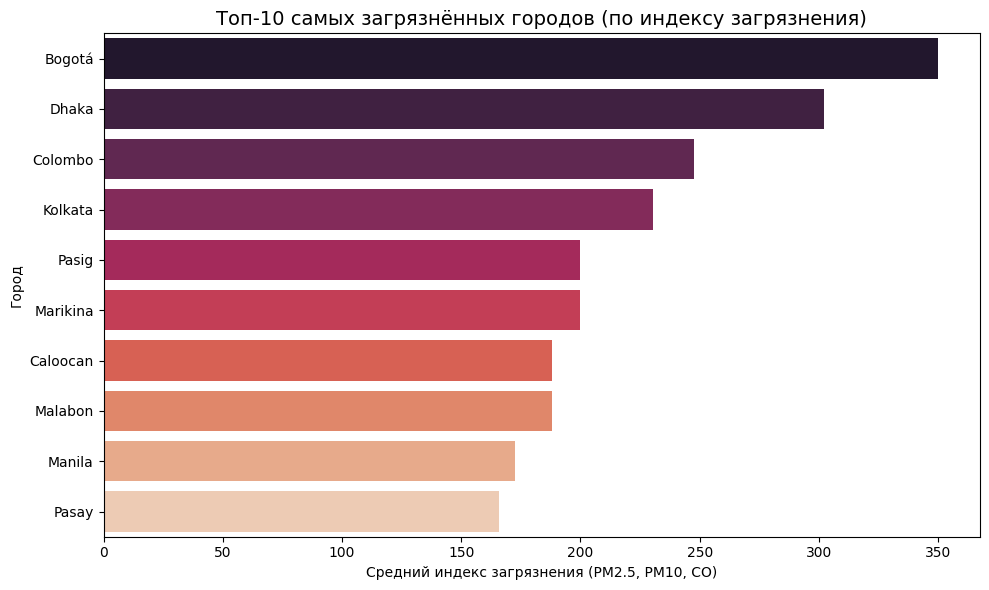

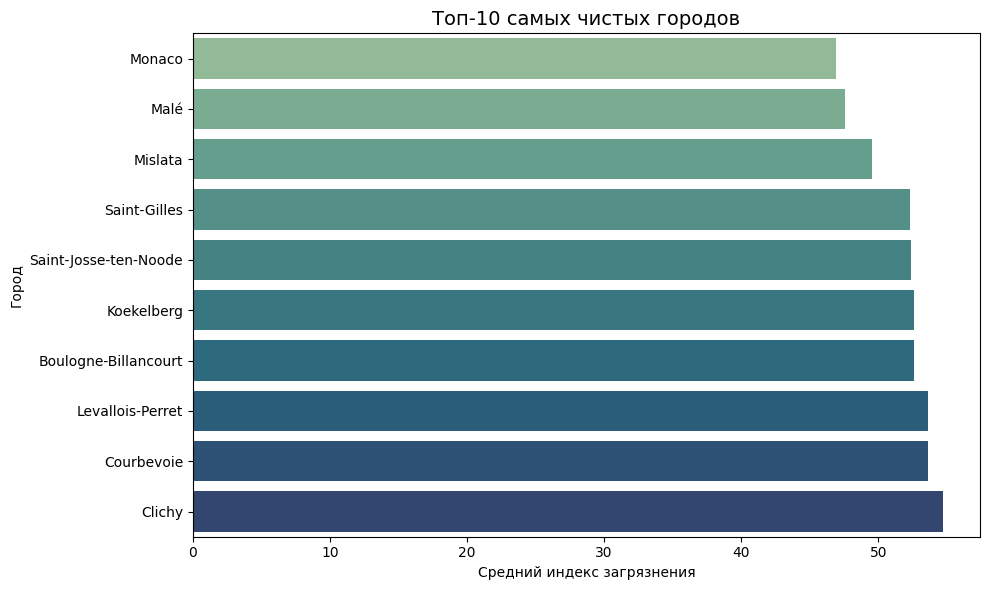

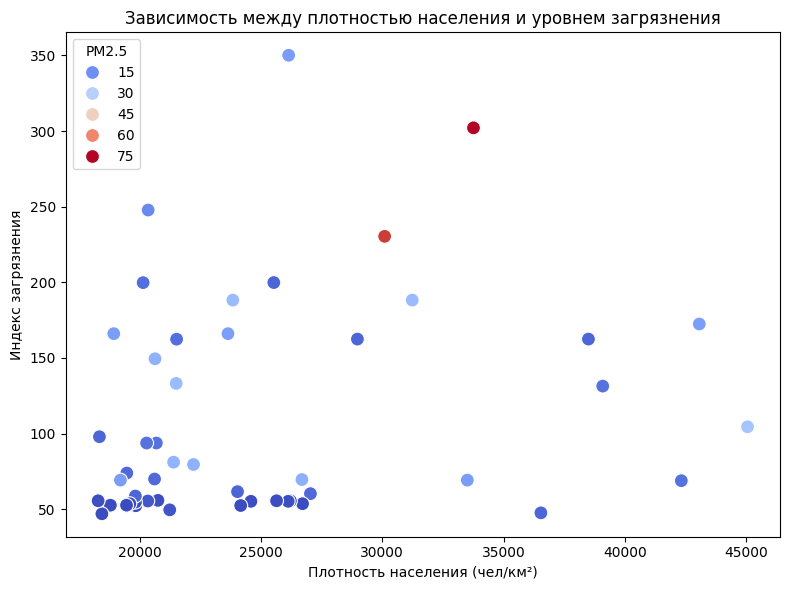

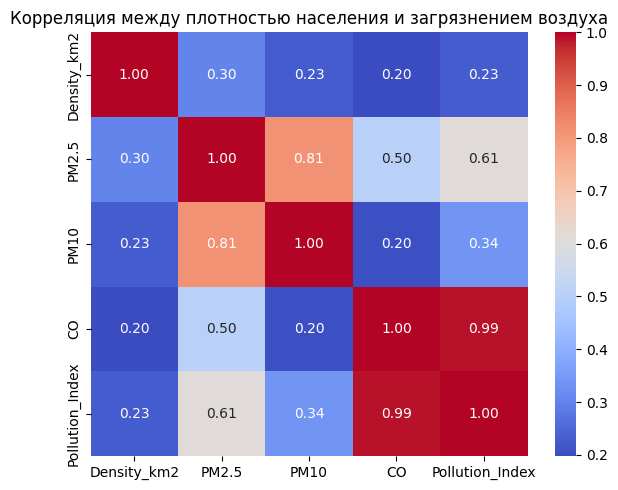

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=clean_df.nlargest(10, "Pollution_Index"),
            x="Pollution_Index", y="City", hue="City", palette="rocket", legend=False)
plt.title("Топ-10 самых загрязнённых городов (по индексу загрязнения)", fontsize=14)
plt.xlabel("Средний индекс загрязнения (PM2.5, PM10, CO)")
plt.ylabel("Город")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=clean_df.nsmallest(10, "Pollution_Index"),
            x="Pollution_Index", y="City", hue="City", palette="crest", legend=False)
plt.title("Топ-10 самых чистых городов", fontsize=14)
plt.xlabel("Средний индекс загрязнения")
plt.ylabel("Город")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=clean_df, x="Density_km2", y="Pollution_Index", hue="PM2.5", palette="coolwarm", s=100)
plt.title("Зависимость между плотностью населения и уровнем загрязнения")
plt.xlabel("Плотность населения (чел/км²)")
plt.ylabel("Индекс загрязнения")
plt.legend(title="PM2.5", loc="upper left")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(clean_df[["Density_km2", "PM2.5", "PM10", "CO", "Pollution_Index"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция между плотностью населения и загрязнением воздуха")
plt.tight_layout()
plt.show()
